# Treinamento Multilayer Perceptron

**Python:** 3.12.2

## Imports

In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import joblib

import dependencies as dep

In [3]:
PATH = '../data/data.csv'
MODEL_PATH = '../multilayer_perceptron.pkl'

SIZE = 800
PATH_BALANCED = f'../data/data_balanced_{SIZE}.csv'

X = 1
O = -1
BLANK = 0

O_WIN   = 0
DRAW    = 1
ONGOING = 2
X_WIN   = 3
class_names = ['O_WIN', 'DRAW', 'ONGOING', 'X_WIN']

## Preparo dos Dados

In [4]:
df = pd.read_csv(PATH_BALANCED)
feature_cols = [str(i) for i in range(9)]
X = df[feature_cols]

y = df['category']
df.sample(10)

,0,1,2,3,4,5,6,7,8,category
1202,-1,1,0,1,1,-1,0,-1,1,2
402,1,0,-1,0,-1,1,-1,1,0,0
153,-1,1,0,-1,1,0,-1,0,1,0
1171,0,0,-1,1,0,0,1,0,0,2
1899,1,1,1,-1,-1,0,1,-1,-1,3
1670,0,0,1,-1,-1,1,-1,0,1,3
884,0,0,0,0,0,1,-1,0,1,2
143,1,1,-1,-1,-1,-1,0,1,0,0
874,-1,1,1,0,0,-1,1,-1,1,2
663,-1,1,1,0,-1,0,0,1,-1,0


In [5]:
# Dataset -> Treino e Temporário
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Temporário -> Teste e Validação
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Treinamento

In [6]:
# Treinamento
# Não precisamos faser cross-validation, já que a performance já foi satisfatória
# Topologia: 9 x 50 x 25 x 4
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train.to_numpy(), y_train.to_numpy())

MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)

[INFO] Tempo de inferência: 0.0010 s

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

       O_WIN     0.9750    0.9750    0.9750       160
        DRAW     0.9639    1.0000    0.9816       160
     ONGOING     0.9388    0.8625    0.8990       160
       X_WIN     0.9281    0.9688    0.9480       160

    accuracy                         0.9516       640
   macro avg     0.9514    0.9516    0.9509       640
weighted avg     0.9514    0.9516    0.9509       640


 ========== CONFUSION MATRIX ==========


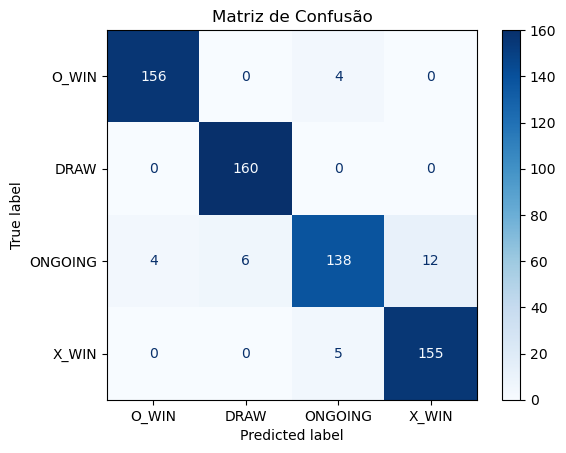


 ========== ROC CURVES (OVR) ==========


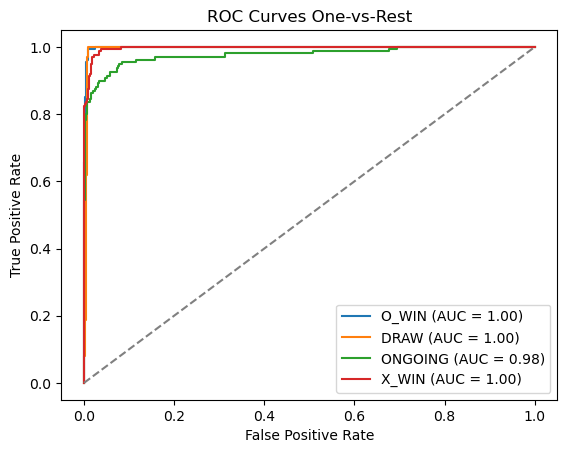


 ========== CALIBRATION CURVES ==========


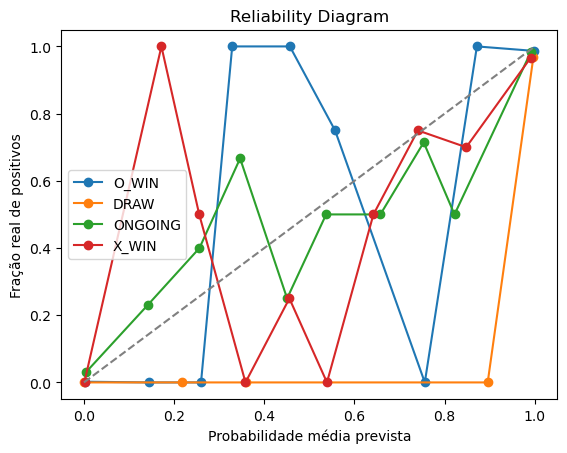

c:\Users\Marnie\anaconda3\envs\TicTacToe\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [7]:
# Validação
dep.test_model(mlp, X_val, y_val, class_names)
y_pred_val = mlp.predict(X_val)

## Teste e Export do Modelo

[INFO] Tempo de inferência: 0.0010 s

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

       O_WIN     0.9618    0.9437    0.9527       160
        DRAW     0.9697    1.0000    0.9846       160
     ONGOING     0.9167    0.8938    0.9051       160
       X_WIN     0.9568    0.9688    0.9627       160

    accuracy                         0.9516       640
   macro avg     0.9512    0.9516    0.9513       640
weighted avg     0.9512    0.9516    0.9513       640


 ========== CONFUSION MATRIX ==========


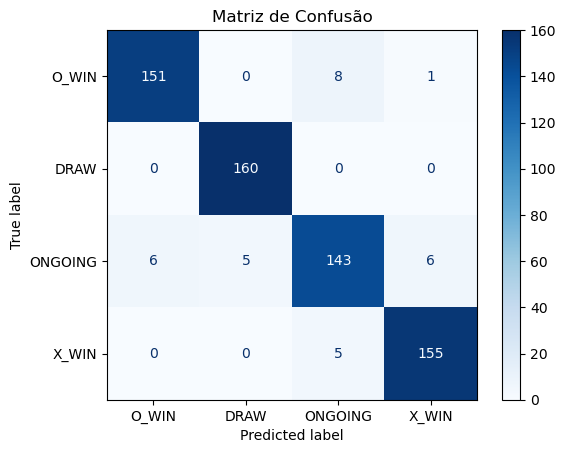


 ========== ROC CURVES (OVR) ==========


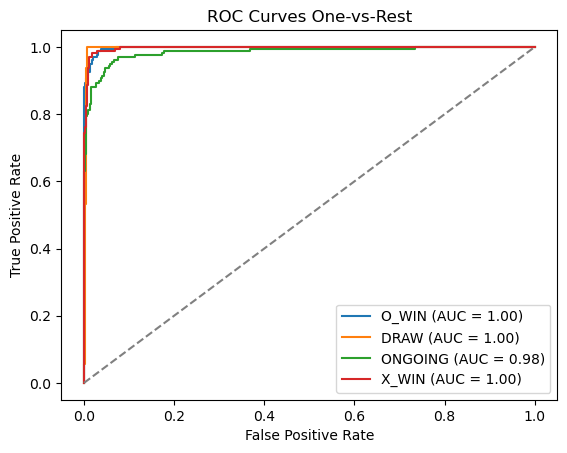


 ========== CALIBRATION CURVES ==========


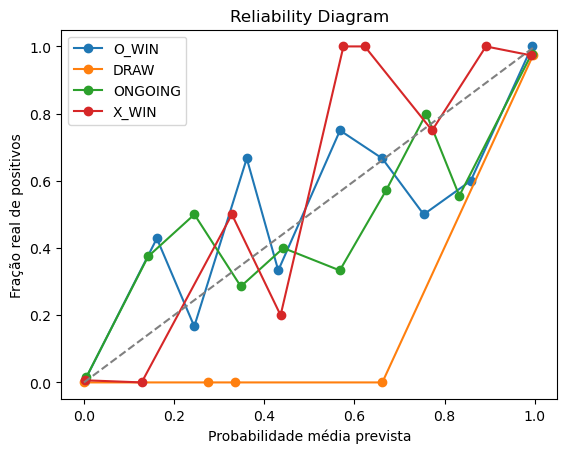

In [8]:
dep.test_model(mlp, X_test, y_test, class_names)

### Análise de Resultados - Testes:
#### Matriz de Confusão
- `DRAW` impecável
- `ONGOING` é a classe mais desafiada, mas com taxa de recall bem superior a 0.89.

#### Curva ROC
- AUC `O_WIN`, `X_WIN`, `DRAW` com excelente separabilidade
- AUC `ONGOING` com valor de 98%, indica que o modelo consegue ranquear bem mesmo quando ainda confunde alguns casos.

### Calibração
- As probabilidades produzidas não seguem bem a proporção real de acertos; faltam ajustes para tornar as estimativas mais honestas.

In [9]:
joblib.dump(mlp, MODEL_PATH)
print(f'MLP salvo em {MODEL_PATH}')

MLP salvo em ../multilayer_perceptron.pkl
